##### tosches turtle data

In this tutorial, we demonstrate how to use DTNE to analyze a single cell dataset, which comes from [Tosches,et al.(2018)](https://www.science.org/doi/10.1126/science.aar4237) and can be downloaded with the [link](https://cblast.gao-lab.org/Tosches_lizard/Tosches_lizard.h5ad).

Load library and data.

In [1]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('Tosches_turtle.h5ad')
adata

AnnData object with n_obs × n_vars = 18664 × 23500
    obs: 'sample', 'region', 'donor', 'cell_type1', 'gender', 'organism', 'dataset_name', 'platform', 'organ', 'data_type', 'cell_ontology_class', 'cell_ontology_id', 'n_genes', 'n_counts', '__libsize__'
    var: 'variable_genes'
    uns: 'author_genes', 'cell_ontology_class_colors', 'cell_type1_colors', 'data_quality', 'donor_colors', 'gender_colors', 'neighbors', 'region_colors', 'sample_colors', 'umap'
    obsm: 'X_umap', 'latent'
    obsp: 'connectivities', 'distances'

In [3]:
cell_ontology_class = adata.obs['cell_ontology_class']
turtle_cluster_set = set(cell_ontology_class)
n_groups = len(turtle_cluster_set)
turtle_zip_types = zip(sorted(turtle_cluster_set),range(len(turtle_cluster_set)))
turtle_dict_types = dict(turtle_zip_types)
turtle_cell_clusters  =  [turtle_dict_types[i] for i in cell_ontology_class]

use DTNE for visualization and clustering.

In [4]:
from dtne import *

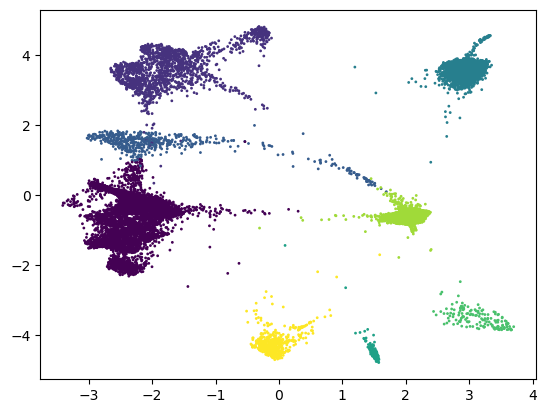

In [5]:
X = adata.obsm['latent']
dtne_operator = DTNE(k_neighbors = 30) 
Y = dtne_operator.fit_transform(X)
dtne_cluster = dtne_operator.cluster_cells(n_clusters=n_groups)
plt.scatter(Y[:,0], Y[:,1], c=dtne_cluster,s=1,cmap='viridis')

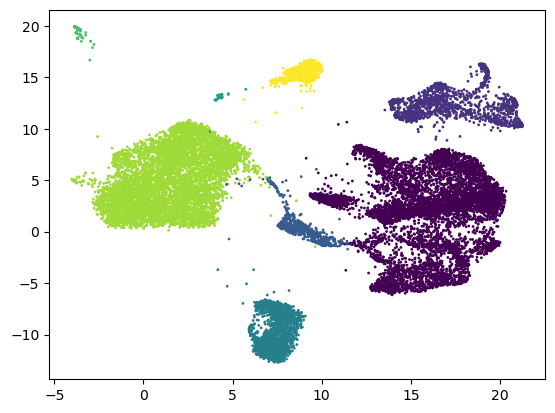

In [6]:
dtne_operator = DTNE(k_neighbors = 30, min_dist = 0.9, solver = 'umap') 
Y2 = dtne_operator.fit_transform(X)
plt.scatter(Y2[:,0], Y2[:,1], c=dtne_cluster,s=1,cmap='viridis')

**Visualize different clustering results using UMAP**

In [7]:
X_umap = adata.obsm['X_umap']

In [8]:
sc.tl.leiden(adata, resolution=0.068, use_weights=True,) # flavor='leidenalg'
leiden_group = np.array(adata.obs['leiden'].values).astype('int')

C:\Users\jiang\AppData\Local\Temp\ipykernel_11696\2219162274.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.068, use_weights=True,) # flavor='leidenalg'


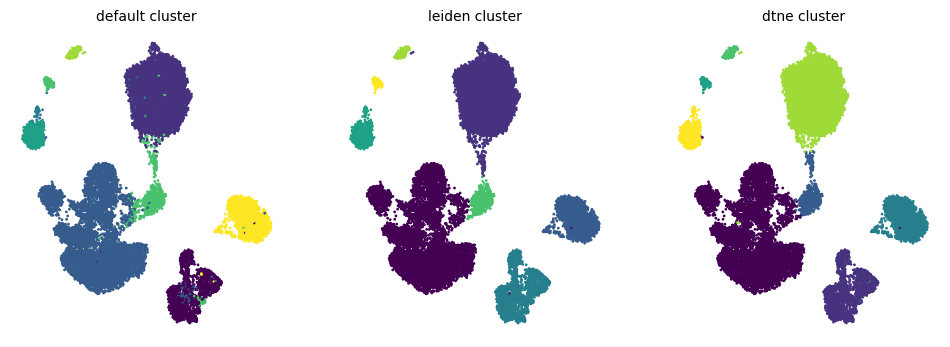

In [9]:
fig,axes = plt.subplots(ncols=3,figsize=(12, 4))
for ax in axes.ravel():
    ax.set_axis_off()
  
title_names = ['default cluster','leiden cluster','dtne cluster',]
cell_colors = [turtle_cell_clusters,leiden_group,dtne_cluster]  

for i,ax in enumerate(axes):
    ax.set_title(title_names[i], fontsize=10)
    ax.scatter(X_umap[:,0], X_umap[:,1],c=cell_colors[i],s=1,cmap='viridis')

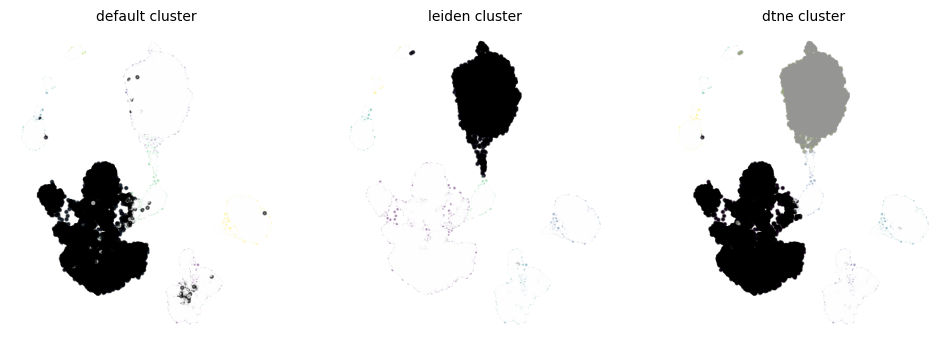

In [10]:
ic_ids1 = [1 if turtle_cell_clusters[i] == 2 else 0 for i in range(len(turtle_cell_clusters))]
ic_ids2 = [1 if leiden_group[i] == 1 else 0 for i in range(len(leiden_group))]

ic_ids31 = [1 if dtne_cluster[i] == 0 else 0 for i in range(len(dtne_cluster))]
ic_ids32 = [0.5 if dtne_cluster[i] == 6 else 0 for i in range(len(dtne_cluster))]
ic_ids3 = np.array(ic_ids31) + np.array(ic_ids32)

fig,axes = plt.subplots(ncols=3,figsize=(12, 4))
for ax in axes.ravel():
    ax.set_axis_off()
  
title_names = ['default cluster','leiden cluster','dtne cluster',]
cell_colors = [turtle_cell_clusters,leiden_group,dtne_cluster]  
ic_ids = [ic_ids1,ic_ids2,ic_ids3]

for i,ax in enumerate(axes):
    ax.set_title(title_names[i], fontsize=10)
    ax.scatter(X_umap[:,0], X_umap[:,1],c=cell_colors[i],s=1,cmap='viridis')
    ax.scatter(X_umap[:,0], X_umap[:,1],c=ic_ids[i],s=5,alpha=0.5,cmap='Grays')

UMAP prioritize showing similarities between nearby points but may distort relationships between distant points.
The UMAP visualizations might not always align perfectly with the actual clustering results.